# [Simple Speaker Listener](https://pettingzoo.farama.org/environments/mpe/simple_speaker_listener/)

В симуляции два агента (`speaker_0` и `listener_0`) и три ориентира (**landmarks**) разных цветов (red, green, blue). Агент `speaker_0` знает цвет ориентира (`goal_id`), так как получает его при каждом наблюдении в виде массива из трех чисел, и может закодировать его в действия. Агент `listener_0` может воспользоваться этой информацией для того, чтобы эффективней двигаться к цели. Вознаграждения агентов определяются расстоянием агента `listener_0` до целевого ориентира.

In [1]:
from pettingzoo.mpe import simple_speaker_listener_v4

env = simple_speaker_listener_v4.env(render_mode="rgb_array")
env.reset()

print(f"{ env.agents = }")
print(f"{ env.agent_selection = }")     # текущий агент

 env.agents = ['speaker_0', 'listener_0']
 env.agent_selection = 'speaker_0'


## Observation space

In [2]:
env.observation_space("speaker_0")

Box(-inf, inf, (3,), float32)

In [3]:
env.observation_space("listener_0")

Box(-inf, inf, (11,), float32)

Наблюдение `speaker_0` всегда неизменно: это `goal_id` целевого ориентира, т.е. его цвет. Если, к примеру, `speaker_0` получает в наблюдении массив `[0.15, 0.65, 0.15]`, то цель – зеленый ориентир.

In [4]:
env.observe("speaker_0")

array([0.15, 0.15, 0.65], dtype=float32)

Наблюдение `listener_0` представляет собой массив из 11 чисел. Первые два числа – скорость (`self_vel`), далее идут три пары чисел (`all_landmark_rel_positions`), в которых содержатся относительные координаты ориентиров, в соответствии с цветом: сначала идут координаты красного ориентира, затем координаты зеленого и синего ориентиров. Последние три значения массива (`communication`) –  закодированное (one-hot) сообщение, полученное от агента `speaker_0`.

In [5]:
env.observe("listener_0")

array([ 0.        ,  0.        ,  1.8809396 ,  0.9289515 ,  1.5533086 ,
        0.07254848,  1.2123407 , -0.5352293 ,  0.        ,  0.        ,
        0.        ], dtype=float32)

## Action space

In [6]:
env.action_space("speaker_0"), env.action_space("listener_0")

(Discrete(3), Discrete(5))

Агент `speaker_0` может совершать одно из трех действий. Это повлияет на последние 3 значения в массиве `observation` агента `listener_0`. 

Агент `listener_0` может совершать одно из 5 действий, как и в симуляции [Simple](https://pettingzoo.farama.org/environments/mpe/simple/) (см. файл simple.ipynb).

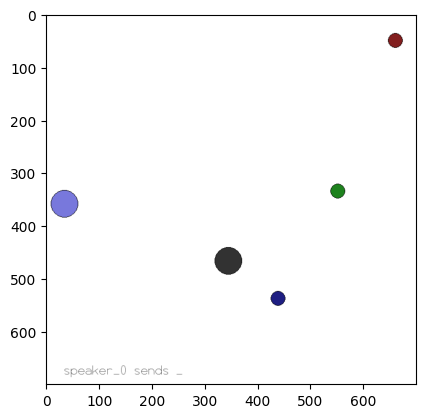

In [7]:
import matplotlib.pyplot as plt
env.step(1)
img = env.render()
plt.imshow(img)

# [Simple Reference](https://pettingzoo.farama.org/environments/mpe/simple_reference/)

Отличие от Simple Speaker Listener в том, что теперь есть два равнозначных агента `agent_0` и `agent_1`, и оба могут двигаться к своим целям и передавать сообщения. Каждому агенту известен цвет целевого ориентира другого агента.

In [8]:
from pettingzoo.mpe import simple_reference_v3

env = simple_reference_v3.env(render_mode="rgb_array")
env.reset()

print(f"{ env.agents = }")
print(f"{ env.agent_selection  = }")

 env.agents = ['agent_0', 'agent_1']
 env.agent_selection  = 'agent_0'


## Observation space

In [16]:
env.observation_space("agent_0")

Box(-inf, inf, (30,), float32)

Первые восемь значений массива наблюдения те же, что и для listener. Следующие три значения кодируют цвет целевого ориентира (`goal_id`) другого агента. Оставшиеся 10 значений кодируют (one-hot) сообщение от другого агента.

In [10]:
env.observe("agent_0")

array([ 0.        ,  0.        ,  0.0737379 , -0.18661073, -0.21453902,
       -0.04235619,  0.7925964 , -1.2371159 ,  0.75      ,  0.25      ,
        0.25      ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ], dtype=float32)

## Action space

In [11]:
env.action_space("agent_0")

Discrete(50)

Действие представляет собой ускорение в одном из направлений (т.е. 5 возможных значений), как и для listener, и сообщение (10 возможных значений). Всего 50 комбинаций. Если мы, к примеру, хотим совешить ускорение вниз (3) и передать сообщение 7, то необходимо совершить действие $10 \times 3 + 7 = 37$.

In [12]:
env.step(37)
env.observe("agent_1")

array([ 0.        ,  0.        , -1.5454968 , -0.1648836 , -1.8337737 ,
       -0.02062906, -0.82663834, -1.2153888 ,  0.75      ,  0.25      ,
        0.25      ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ], dtype=float32)

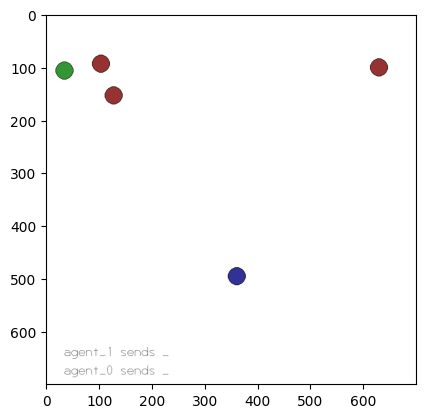

In [13]:
import matplotlib.pyplot as plt
img = env.render()
plt.imshow(img)

# [Simple Spread](https://pettingzoo.farama.org/environments/mpe/simple_spread/)

Среда содержит `N` агентов и столько же ориентиров (по умолчанию `N=3`). Агенты должны научиться покрывать все ориентиры избегая столкновений друг с другом.

In [50]:
from pettingzoo.mpe import simple_spread_v3

env = simple_spread_v3.env(N=3, render_mode="rgb_array")
env.reset()

print(f"{ env.agents = }")
print(f"{ env.agent_selection  = }")

 env.agents = ['agent_0', 'agent_1', 'agent_2']
 env.agent_selection  = 'agent_0'


## Observation space

In [51]:
env.observation_space("agent_0")

Box(-inf, inf, (18,), float32)

Наблюдение состоит из $6 \times N$ значений. Первые 4 значения – собственные скорость и координата агента (`self_vel`, `self_pos`). Далее идет $2 \times N$ значений для относительных координат ориентирова (`landmark_rel_positions`). Далее идет $2 \times (N-1)$ значений для относительных координат других агентов. Последние $2 \times (N-1)$ значений отводятся для получения сообщений от остальных агентов.

In [52]:
env.observe("agent_0")

array([ 0.        ,  0.        ,  0.2686192 , -0.8819988 , -0.07310266,
        1.2367445 , -0.5964438 ,  1.0329964 ,  0.54657054,  0.0997561 ,
        0.72778964,  1.1294749 , -0.74122036,  0.051687  ,  0.        ,
        0.        ,  0.        ,  0.        ], dtype=float32)

## Action space

In [53]:
env.action_space("agent_1")

Discrete(5)

In [81]:
env.step(0)
print(f"{ env.agent_selection  = }")
env.observe("agent_1")

 env.agent_selection  = 'agent_0'


array([ 0.9748306 ,  0.        ,  2.0064766 ,  0.2474761 , -1.81096   ,
        0.10726967, -2.3343012 , -0.09647842, -1.1912868 , -1.0297188 ,
       -0.72778964, -1.0794748 , -1.46901   , -1.0777879 ,  0.        ,
        0.        ,  0.        ,  0.        ], dtype=float32)

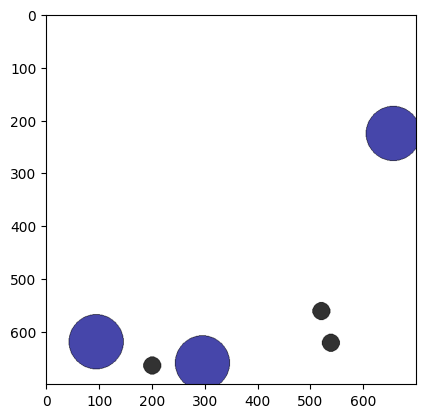

In [40]:
import matplotlib.pyplot as plt
img = env.render()
plt.imshow(img)